In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

school: 
Name of the school the student is enrolled in.

school_setting: 
The location of the school

school_type: 
The type of school. Either public or non-public

classroom: 
The type of classroom

teaching_method: 
Teaching methods: Either experimental or Standard

n_student: 
Number of students in the class

student_id: 
A unique ID for each student

gender: 
The gender of the students: male or female

lunch: 
Whether a student qualifies for free/subsidized lunch or not

pretest: 
The pretest score of the students out of 100

posttest: 
The posttest scores of the students out of 100

In [2]:
df = pd.read_csv('test_scores.csv')
print(df.columns.values)

['school' 'school_setting' 'school_type' 'classroom' 'teaching_method'
 'n_student' 'student_id' 'gender' 'lunch' 'pretest' 'posttest']


In [3]:
display(df)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [5]:
df.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [6]:
df.describe(include=['O'])

,school,school_setting,school_type,classroom,teaching_method,student_id,gender,lunch
count,2133,2133,2133,2133,2133,2133,2133,2133
unique,23,3,2,97,2,2133,2,2
top,GOOBU,Urban,Public,18K,Standard,2FHT3,Male,Does not qualify
freq,158,906,1582,31,1373,1,1077,1215


In [7]:
df.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [8]:
print('_'*40)
print('Title: school_setting')
print(df['school_setting'].value_counts())
print('_'*40)
print('Title: school_type')
print(df['school_type'].value_counts())
print('_'*40)
print('Title: teaching_method')
print(df['teaching_method'].value_counts())
print('_'*40)
print('Title: gender')
print(df['gender'].value_counts())
print('_'*40)
print('Title: lunch')
print(df['lunch'].value_counts())
print('_'*40)

________________________________________
Title: school_setting
Urban       906
Suburban    717
Rural       510
Name: school_setting, dtype: int64
________________________________________
Title: school_type
Public        1582
Non-public     551
Name: school_type, dtype: int64
________________________________________
Title: teaching_method
Standard        1373
Experimental     760
Name: teaching_method, dtype: int64
________________________________________
Title: gender
Male      1077
Female    1056
Name: gender, dtype: int64
________________________________________
Title: lunch
Does not qualify                    1215
Qualifies for reduced/free lunch     918
Name: lunch, dtype: int64
________________________________________


In [9]:
print('_'*40)
print('Title: school')
print(df['school'].value_counts())
print('_'*40)

print('Title: classroom')
print(df['classroom'].value_counts())
print('_'*40)

print('Title: n_student')
print(df['n_student'].value_counts())
print('_'*40)

print('Title: pretest')
print(df['pretest'].value_counts())
print('_'*40)

print('Title: posttest')
print(df['posttest'].value_counts())
print('_'*40)

________________________________________
Title: school
GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
IDGFP     94
UAGPU     87
UUUQX     84
OJOBU     81
CIMBB     74
ZMNYA     69
GOKXL     64
LAYPA     57
KFZMY     52
VHDHF     51
FBUMG     46
ANKYI     41
Name: school, dtype: int64
________________________________________
Title: classroom
18K    31
ZBH    30
QA2    30
Q0E    30
YTB    30
       ..
SSP    15
KR1    15
IQN    15
JGD    14
197    14
Name: classroom, Length: 97, dtype: int64
________________________________________
Title: n_student
22.0    264
21.0    231
27.0    189
28.0    168
20.0    160
30.0    150
24.0    144
23.0    138
17.0    136
19.0    133
25.0    125
18.0     72
16.0     64
15.0     45
31.0     31
29.0     29
14.0     28
26.0     26
Name: n_student, dtype: int64
________________________________________
Title: pretest
60.0    73
63.0    64
58.0    63
59.0    61
62.0 

In [10]:
df['approved'] = df['posttest']
df.loc[ df['approved'] < 60.0, 'approved'] = 0
df.loc[ df['approved'] >= 60.0, 'approved'] = 1
df['approved'] = df['approved'].astype(int)  
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,approved
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0,1
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0,1
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0,1
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0,1
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0,1


C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='n_student'>

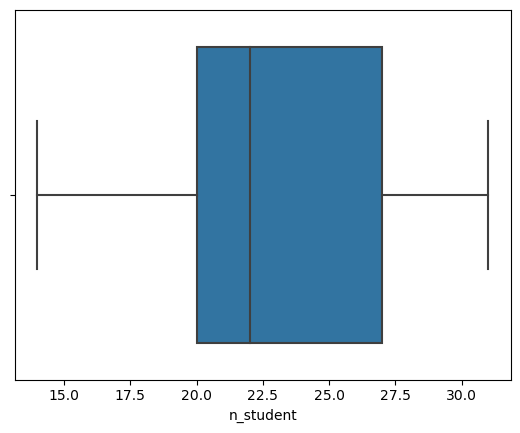

In [11]:
sns.boxplot(df.n_student)

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pretest'>

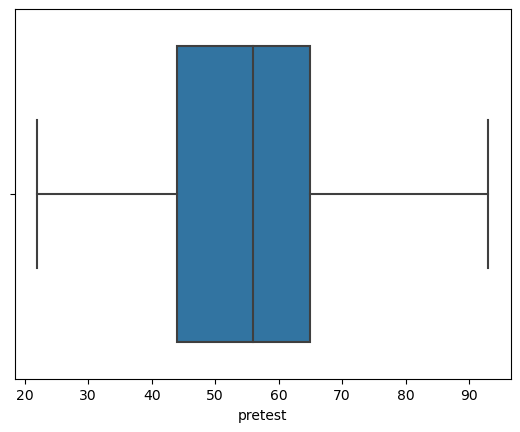

In [12]:
sns.boxplot(df.pretest)

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='posttest'>

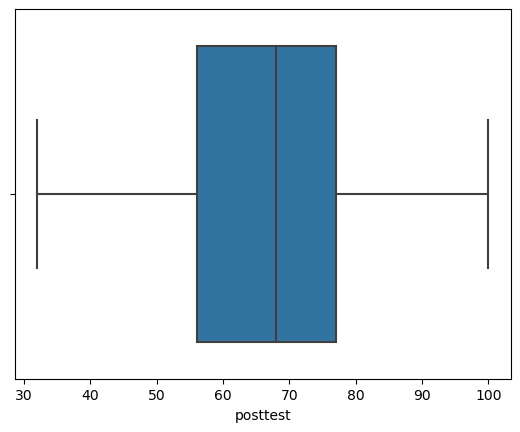

In [13]:
sns.boxplot(df.posttest)

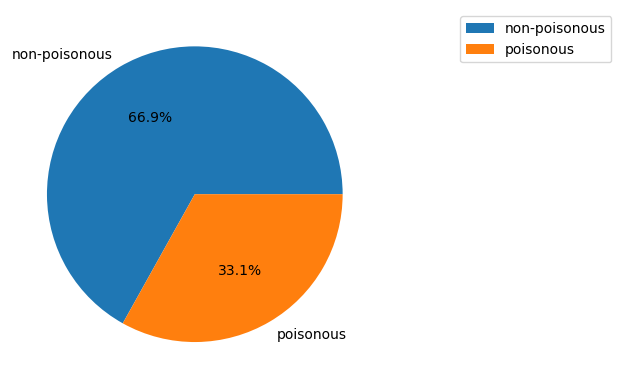

In [14]:
aprovados = df['approved'].value_counts()
sort = ['non-poisonous', 'poisonous']
plt.pie(aprovados, labels=sort, autopct = '%1.1f%%')
plt.legend(sort, bbox_to_anchor=(1.2, 1))



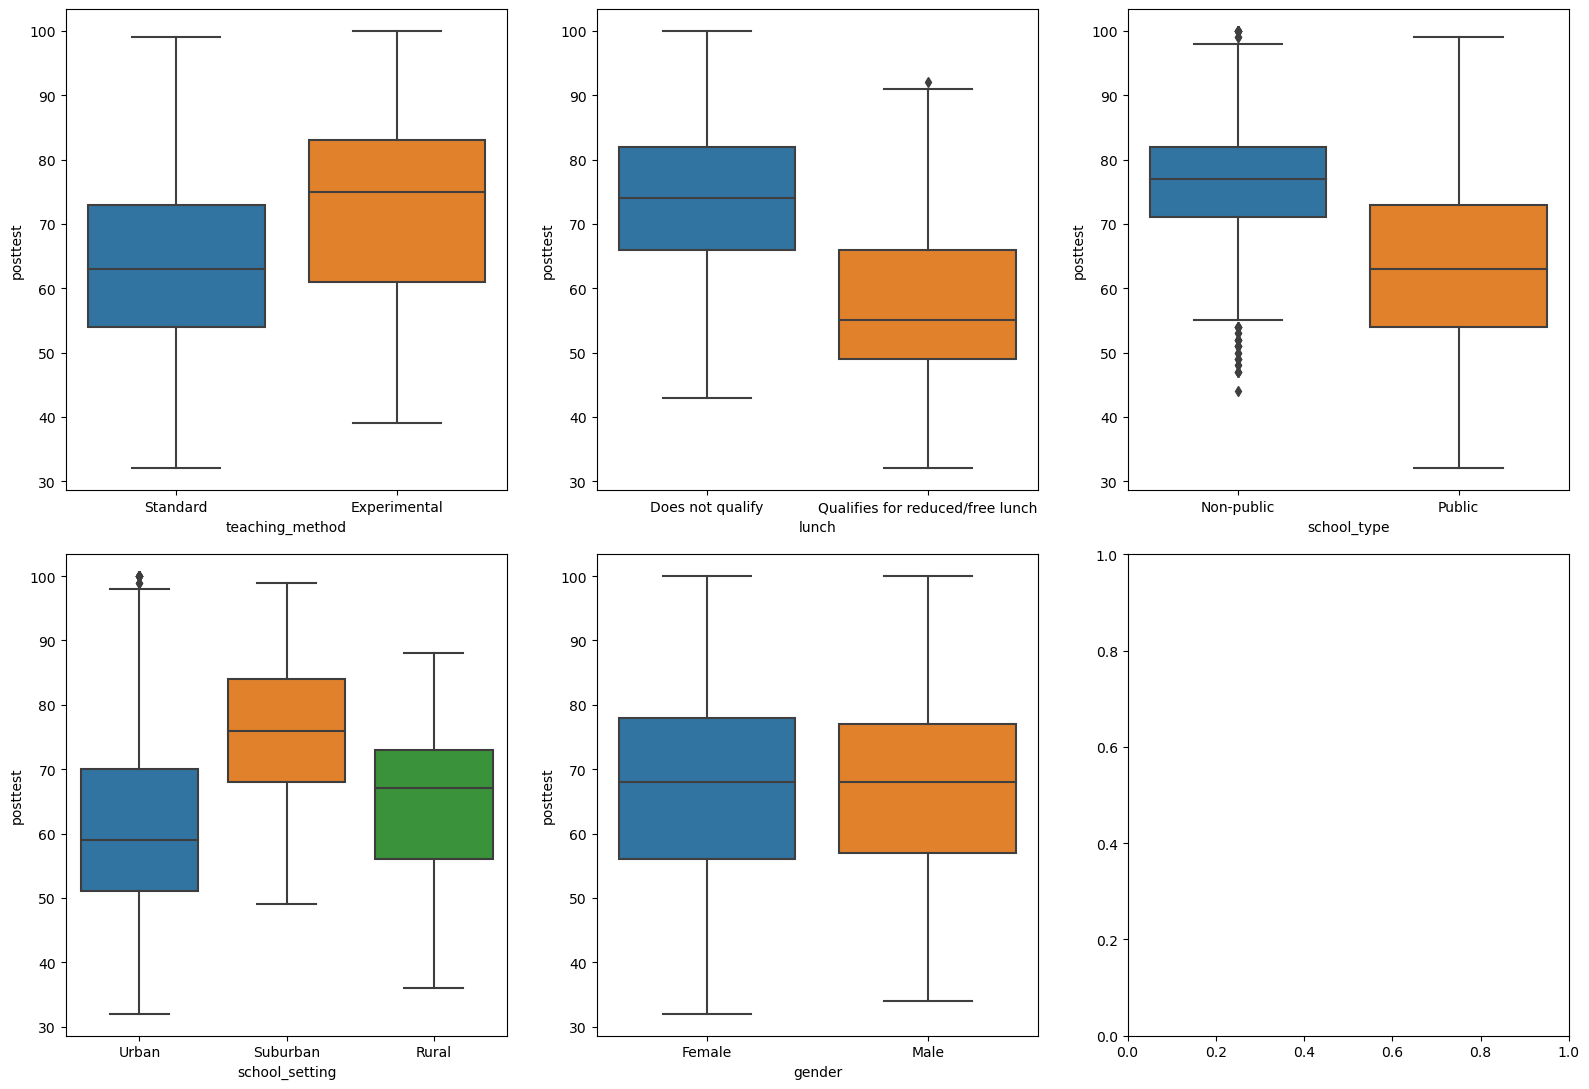

In [31]:
f, axes = plt.subplots(2, 3,figsize=(16,11))
sns.boxplot(data=df, x='teaching_method', y='posttest', ax=axes[0, 0])
sns.boxplot(data=df, x='lunch', y='posttest', ax=axes[0, 1])
sns.boxplot(data=df, x='school_type', y='posttest', ax=axes[0,2])
sns.boxplot(data=df, x='school_setting', y='posttest', ax=axes[1, 0])
sns.boxplot(data=df, x='gender', y='posttest', ax=axes[1, 1])
plt.tight_layout()
plt.show()

In [ ]:
tschool_setting = df['school_type'].value_counts()
plt.title('The location of the school')
plt.xlabel('Continent')
plt.ylabel('The amount')
tschool_setting.plot.bar()

In [ ]:
tschool_setting = df['teaching_method'].value_counts()
plt.title('The location of the school')
plt.xlabel('Continent')
plt.ylabel('The amount')
tschool_setting.plot.bar()

In [ ]:
tschool_setting = df['gender'].value_counts()
plt.title('The location of the school')
plt.xlabel('Continent')
plt.ylabel('The amount')
tschool_setting.plot.bar()

In [ ]:
tschool_setting = df['lunch'].value_counts()
plt.title('The location of the school')
plt.xlabel('Continent')
plt.ylabel('The amount')
tschool_setting.plot.bar()

In [ ]:
to_exchange = {
    'Public' : 1,
    'Non-public' : 0
}
df.school_type = df.school_type.map(to_exchange)

to_exchange = {    
    'Male' : 1,
    'Female' : 0
}
df.gender = df.gender.map(to_exchange)

to_exchange = {    
    'Rural' :2,
    'Urban' : 1,
    'Suburban' : 0
}
df.school_setting = df.school_setting.map(to_exchange)

to_exchange = {   
    'Standard' : 1,
    'Experimental' : 0
}
df.teaching_method = df.teaching_method.map(to_exchange)

to_exchange = {    
    'Does not qualify' : 1,
    'Qualifies for reduced/free lunch' : 0
}
df.lunch = df.lunch.map(to_exchange)
display(df)

In [ ]:
df = df.drop(columns = ["student_id"], axis=1)
df.head()

In [ ]:
df['n_studentGroup'] = pd.cut(df['n_student'], 5)
df[['n_studentGroup']].groupby(['n_studentGroup'], as_index=False).mean().sort_values(by='n_studentGroup', ascending=True)

In [ ]:
df.loc[ df['n_student'] <= 13.0, 'n_student'] = 0
df.loc[(df['n_student'] > 17.0) & (df['n_student'] <= 20.0), 'n_student'] = 1
df.loc[(df['n_student'] > 20.0) & (df['n_student'] <= 24.0), 'n_student'] = 2
df.loc[(df['n_student'] > 24.0) & (df['n_student'] <= 27.0), 'n_student'] = 3
df.loc[ df['n_student'] > 27.0, 'n_student'] = 4
df['n_student'] = df['n_student'].astype(int)    
df.head()

In [ ]:
df['pretestGroup'] = pd.cut(df['pretest'], 5)
df[['pretestGroup']].groupby(['pretestGroup'], as_index=False).mean().sort_values(by='pretestGroup', ascending=True)

In [ ]:
df.loc[ df['pretest'] <= 36.0, 'pretest'] = 0
df.loc[(df['pretest'] > 36.0) & (df['pretest'] <= 50.0), 'pretest'] = 1
df.loc[(df['pretest'] > 50.0) & (df['pretest'] <= 64.0), 'pretest'] = 2
df.loc[(df['pretest'] > 64.0) & (df['pretest'] <= 78.0), 'pretest'] = 3
df.loc[ df['pretest'] > 78.0, 'pretest'] = 4
df['pretest'] = df['pretest'].astype(int)    
df.head()

In [ ]:
df['posttestGroup'] = pd.cut(df['posttest'], 5)
df[['posttestGroup']].groupby(['posttestGroup'], as_index=False).mean().sort_values(by='posttestGroup', ascending=True)

In [ ]:
df.loc[ df['posttest'] <= 31.0, 'posttest'] = 0
df.loc[(df['posttest'] > 45.0) & (df['posttest'] <= 59.0), 'posttest'] = 1
df.loc[(df['posttest'] > 59.0) & (df['posttest'] <= 72.0), 'posttest'] = 2
df.loc[(df['posttest'] > 72.0) & (df['posttest'] <= 86.0), 'posttest'] = 3
df.loc[ df['posttest'] > 86.0, 'posttest'] = 4
df['posttest'] = df['posttest'].astype(int)    
df.head()

In [ ]:
df = df.drop(columns = ["pretestGroup", "posttestGroup", "n_studentGroup", "approved"], axis=1)
df.head()

In [ ]:
df.info()

In [ ]:
x = df[["school_setting","school_type","teaching_method","n_student","gender","lunch","pretest"]]
x.head()

In [ ]:
y = df["posttest"]
y.head()

In [ ]:
df.shape

In [ ]:
train_x = x[:1600]
train_y = y[:1600]
test_x = x[1600:]
test_y = y[1600:]

print("We will train with %d elements and test with %d elements" % (len(train_x), len(test_x)))

In [ ]:
train_x.shape, train_y.shape, test_x.shape, 

In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train_x, train_y)
pred = logreg.predict(test_x)
acc_log = round(logreg.score(train_x, train_y) * 100, 2)
acc_log

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(train_x, train_y)
pred = svc.predict(test_x)
acc_svc = round(svc.score(train_x, train_y) * 100, 2)
acc_svc

In [ ]:
# k-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_x, train_y)
pred = knn.predict(test_x)
acc_knn = round(knn.score(train_x, train_y) * 100, 2)
acc_knn

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train_x, train_y)
pred = gaussian.predict(test_x)
acc_gaussian = round(gaussian.score(train_x, train_y) * 100, 2)
acc_gaussian

In [ ]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train_x, train_y)
pred = perceptron.predict(test_x)
acc_perceptron = round(perceptron.score(train_x, train_y) * 100, 2)
acc_perceptron

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(train_x, train_y)
pred = linear_svc.predict(test_x)
acc_linear_svc = round(linear_svc.score(train_x, train_y) * 100, 2)
acc_linear_svc

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train_x, train_y)
pred = sgd.predict(test_x)
acc_sgd = round(sgd.score(train_x, train_y) * 100, 2)
acc_sgd

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)
pred = decision_tree.predict(test_x)
acc_decision_tree = round(decision_tree.score(train_x, train_y) * 100, 2)
acc_decision_tree

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x, train_y)
pred = random_forest.predict(test_x)
random_forest.score(train_x, train_y)
acc_random_forest = round(random_forest.score(train_x, train_y) * 100, 2)
acc_random_forest

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)